In [329]:
import pandas
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [330]:
teste = pandas.read_csv("nba_teste.csv")
treino = pandas.read_csv("nba_treino.csv")
# Assuming you have your training data and labels stored in `treino` dataframe
X_train = treino.iterrows()
y_train = treino['TARGET_5Yrs'].values

# Assuming you have your test data and labels stored in `teste` dataframe
X_test = teste.iterrows()
y_test = teste['TARGET_5Yrs'].values

### Aprendizado Supervisionado

#### K Nearest Neighbors (KNN)

O algoritmo K Nearest Neighbors (KNN) é um método de aprendizado de máquina supervisionado que funciona com base no princípio de que os pontos de dados semelhantes tendem a ter rótulos semelhantes.

Na função `k_nearest_neighbors` abaixo, o algoritmo KNN é implementado para um problema de classificação binária. A função aceita quatro argumentos: o conjunto de treinamento (`train`), os rótulos do conjunto de treinamento (`y_train`), um ponto de teste (`test_point`) e o número de vizinhos a considerar (`k`).

A função começa calculando a distância euclidiana entre o ponto de teste e todos os pontos no conjunto de treinamento. Em seguida, ela obtém os índices dos `k` pontos mais próximos.

Para cada um dos `k` pontos mais próximos, a função verifica a classe do ponto (0 ou 1) e incrementa um contador para essa classe. Depois de verificar todos os `k` pontos mais próximos, a função determina a classe do ponto de teste com base na classe mais frequente entre os `k` pontos mais próximos.

Se a classe 1 for mais frequente, a classe do ponto de teste é definida como 1. Caso contrário, é definida como 0. Finalmente, a função retorna a classe do ponto de teste.

In [331]:
def k_nearest_neighbors(train, y_train, test_point, k):
    # Calcula a distância euclidiana entre o ponto de teste e todos os pontos no conjunto de treinamento
    distances = np.sqrt(np.sum((train[:, :-1] - test_point[:-1])**2, axis=1))
    
    # Obtém os índices dos k pontos mais próximos
    sorted_indices = distances.argsort()[:k]
    
    # Inicializa contadores para as classes 0 e 1
    count_1 = 0
    count_0 = 0

    # Para cada um dos k pontos mais próximos
    for indice in sorted_indices:
        # Se a classe do ponto é 1, incrementa o contador para a classe 1
        if train[indice, -1] == 1:
            count_1 += 1
        # Se a classe do ponto é 0, incrementa o contador para a classe 0
        elif train[indice, -1] == 0:
            count_0 += 1

    # Se a classe 1 foi a mais frequente entre os k pontos mais próximos, a classe do ponto de teste é 1
    if count_1 > count_0:
        query_label = 1
    # Caso contrário, a classe do ponto de teste é 0
    else:
        query_label = 0
    
    # Retorna a classe do ponto de teste
    return query_label

##### Cálculo das métricas (Acurácia, Precisão, Revocação (Recall) e F1)

A função `calculate_classification_metrics` calcula as quatro métricas de classificação a partir de uma matriz de confusão: acurácia, precisão, recall e a pontuação F1. Essas métricas são usadas para avaliar o desempenho de um classificador, nesse caso o K-Nearest Neighbors (KNN).

1. **Acurácia**: Esta métrica indica a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. É calculada somando os verdadeiros positivos e verdadeiros negativos e dividindo pelo total de previsões.

2. **Precisão**: Esta métrica indica a proporção de previsões positivas que foram corretamente identificadas. É calculada dividindo os verdadeiros positivos pela soma de verdadeiros positivos e falsos positivos. A precisão é uma medida útil quando o custo de um falso positivo é alto.

3. **Recall (Sensibilidade)**: Esta métrica indica a proporção de verdadeiros positivos que foram corretamente identificados. É calculada dividindo os verdadeiros positivos pela soma de verdadeiros positivos e falsos negativos. O recall é uma medida útil quando o custo de um falso negativo é alto.

4. **Pontuação F1**: Esta métrica é a média harmônica da precisão e do recall. Ela tenta equilibrar as duas métricas e é uma medida útil quando você precisa de um equilíbrio entre precisão e recall e há uma distribuição desigual de classes.

Essas métricas fornecem uma visão abrangente do desempenho do modelo, permitindo avaliar a qualidade das previsões do modelo em diferentes aspectos.

In [332]:
def calculate_classification_metrics(confusion_matrix):
    # Desempacota a matriz de confusão nos quatro componentes: verdadeiro negativo, falso positivo, falso negativo e verdadeiro positivo
    true_positive, false_negative, false_positive, true_negative = confusion_matrix
    
    # Calcula a acurácia como a soma de verdadeiros positivos e verdadeiros negativos dividido pelo total de previsões
    accuracy = (true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive)
    
    # Calcula a precisão como verdadeiros positivos dividido pela soma de verdadeiros positivos e falsos positivos
    precision = true_positive / (true_positive + false_positive)
    
    # Calcula o recall (sensibilidade) como verdadeiros positivos dividido pela soma de verdadeiros positivos e falsos negativos
    recall = true_positive / (true_positive + false_negative)
    
    # Calcula a pontuação F1 como a média harmônica de precisão e recall
    f1 = 2 * (precision * recall) / (precision + recall)
    
    # Retorna as métricas de classificação calculadas
    return accuracy, precision, recall, f1


##### Cálculo da Matriz de Confusão

A matriz de confusão é uma tabela usada para descrever o desempenho de um modelo de classificação, contendo informações sobre previsões verdadeiras e falsas feitas por um classificador, neste caso, o K-Nearest Neighbors (KNN).

Na função `calculate_confusion_matrix`, a matriz de confusão é calculada comparando os valores verdadeiros (`y_true`) com os valores previstos (`y_pred`). A função inicializa contadores para verdadeiros positivos (TP), verdadeiros negativos (TN), falsos positivos (FP) e falsos negativos (FN).

Para cada par de valores verdadeiros e previstos, a função verifica se o valor verdadeiro e o valor previsto são ambos 1 (TP), se o valor verdadeiro e o valor previsto são ambos 0 (TN), se o valor verdadeiro é 0 e o valor previsto é 1 (FP), ou se o valor verdadeiro é 1 e o valor previsto é 0 (FN). Dependendo do caso, o contador correspondente é incrementado.

Finalmente, a função retorna a matriz de confusão como uma tupla contendo os contadores para TP, FN, FP e TN, nesta ordem.

Essa matriz de confusão vai ser utilizada ao final para calcular várias métricas de classificação, como acurácia, precisão, recall e pontuação F1.

In [333]:
def calculate_confusion_matrix(y_true, y_pred):
    # Inicializa contadores para verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    # Para cada par de valores verdadeiros e previstos
    for i in range(len(y_pred)):
        # Se o valor verdadeiro e o valor previsto são ambos 1, incrementa o contador de verdadeiros positivos
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positive += 1
        # Se o valor verdadeiro e o valor previsto são ambos 0, incrementa o contador de verdadeiros negativos
        elif y_true[i] == 0 and y_pred[i] == 0:
            true_negative += 1
        # Se o valor verdadeiro é 0 e o valor previsto é 1, incrementa o contador de falsos positivos
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positive += 1
        # Se o valor verdadeiro é 1 e o valor previsto é 0, incrementa o contador de falsos negativos
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negative += 1
    
    # Cria a matriz de confusão com os contadores calculados
    confusion_matrix = true_positive, false_negative, false_positive, true_negative
    
    # Retorna a matriz de confusão
    return confusion_matrix

##### Resultado das Métricas do KNN

In [334]:
# Define uma lista de valores para o parâmetro k do algoritmo k-NN
k_values = [2, 10, 50, 150]

# Para cada valor de k
for k in k_values:
    # Inicializa um vetor de zeros para armazenar as previsões do modelo
    y_pred_k = np.zeros(teste.shape[0])
    j = 0
    # Para cada ponto no conjunto de teste
    for id, row in teste.iterrows():
        # Obtém os valores do ponto
        point = row.values
        # Usa o algoritmo k-NN para prever a classe do ponto e armazena a previsão no vetor y_pred_k
        y_pred_k[j] = k_nearest_neighbors(treino.values, y_train, point, k)
        j+=1
    # Calcula a matriz de confusão a partir dos valores verdadeiros e previstos
    confusion_matrices = calculate_confusion_matrix(y_test, y_pred_k)
    # Calcula as métricas de classificação a partir da matriz de confusão
    accuracy, precision, recall, f1 = calculate_classification_metrics(confusion_matrices)

    # Imprime o valor de k e as métricas de classificação
    print("K:", k)
    print("Confusion Matrix:", confusion_matrices)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("--------------------------------------------------")
    print()

K: 2
Confusion Matrix: (74, 94, 27, 73)
Accuracy: 0.5485074626865671
Precision: 0.7326732673267327
Recall: 0.44047619047619047
F1 Score: 0.550185873605948
--------------------------------------------------

K: 10
Confusion Matrix: (111, 57, 42, 58)
Accuracy: 0.6305970149253731
Precision: 0.7254901960784313
Recall: 0.6607142857142857
F1 Score: 0.6915887850467289
--------------------------------------------------

K: 50
Confusion Matrix: (126, 42, 46, 54)
Accuracy: 0.6716417910447762
Precision: 0.7325581395348837
Recall: 0.75
F1 Score: 0.7411764705882353
--------------------------------------------------

K: 150
Confusion Matrix: (128, 40, 44, 56)
Accuracy: 0.6865671641791045
Precision: 0.7441860465116279
Recall: 0.7619047619047619
F1 Score: 0.7529411764705882
--------------------------------------------------



##### Análise dos resultados obtidos para as métricas do KNN

1. **k = 2**: Com k = 2, o modelo tem a menor acurácia entre todos os valores de k testados. Além disso, também tem dificuldade de identificar todas as instâncias positivas. Um dos motivos para isso ocorrer pode ser devido ao fato de que um k pequeno faz com que o algoritmo seja sensível ao ruído nos dados (overfitting).

2. **k = 10**: Com k = 10, a acurácia do modelo aumenta, o que sugere que aumentar o valor de k pode ajudar a melhorar o desempenho do modelo, possivelmente porque um k maior torna o algoritmo menos sensível ao ruído. O recall também é maior, o que indica que o modelo está se tornando melhor em identificar as instâncias positivas.

3. **k = 50**: Com k = 50, o modelo alcançou a maior quantidade de verdadeiros positivos e suas métricas se tornam melhores no geral, o que indica que ele está aprendendo mais no treinamento.

4. **k = 150**: Com k = 150, a acurácia do modelo é a mais alta entre todos os valores de k testados. No entanto, é importante notar que um k muito grande pode fazer com que o algoritmo considere pontos que estão relativamente distantes do ponto de teste, o que pode levar a previsões menos precisas.

##### Comparação das métricas a medida que k aumenta

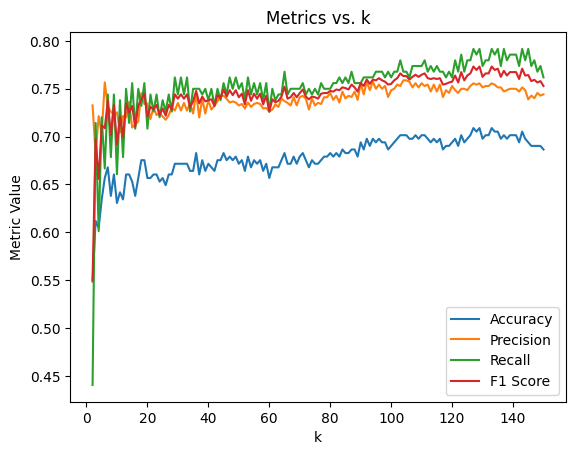

In [335]:
# Define a list of values for k
k_values = list(range(2, 151))

# Define empty lists to store the metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []

# For each value of k
for k in k_values:
    # Inicializa um vetor de zeros para armazenar as previsões do modelo
    y_pred_k = np.zeros(teste.shape[0])
    j = 0
    # Para cada ponto no conjunto de teste
    for id, row in teste.iterrows():
        # Obtém os valores do ponto
        point = row.values
        # Usa o algoritmo k-NN para prever a classe do ponto e armazena a previsão no vetor y_pred_k
        y_pred_k[j] = k_nearest_neighbors(treino.values, y_train, point, k)
        j+=1
    # Calcula a matriz de confusão a partir dos valores verdadeiros e previstos
    confusion_matrices = calculate_confusion_matrix(y_test, y_pred_k)
    # Calcula as métricas de classificação a partir da matriz de confusão
    accuracy, precision, recall, f1 = calculate_classification_metrics(confusion_matrices)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot the metric values against the variation of the value of k
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')

# Set the labels for the x-axis and y-axis
plt.xlabel('k')
plt.ylabel('Metric Value')

# Set the title of the plot
plt.title('Metrics vs. k')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


Como foi possível observar com os resultados das métricas e a partir do gráfico acima, o valor de k tem um impacto significativo no desempenho do algoritmo.

Quando k é pequeno, o algoritmo é altamente sensível ao ruído, outliers e discrepâncias nos dados. Isso pode resultar em overfitting, onde o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados.

À medida que aumentamos o valor de k, o algoritmo se torna mais resistente ao ruído e outliers. Isso ocorre porque a classificação de um ponto de dados é agora baseada em um número maior de vizinhos, o que torna menos provável que um pequeno número de pontos de dados ruidosos ou discrepantes afete a classificação. Isso pode resultar em um modelo mais robusto e melhor generalização para novos dados, levando a melhorias nas métricas de classificação.

No entanto, é importante notar que aumentar o valor de k indefinidamente não continuará melhorando o desempenho do modelo. Se k for muito grande, o modelo pode se tornar muito generalizado, levando a underfitting, onde o modelo é muito simples para capturar a estrutura subjacente dos dados.

##### Extra - KNN com scikit-learn

In [336]:
# Remove a coluna 'TARGET_5Yrs' do conjunto de treino e teste, criando as matrizes de características
train_X = treino.drop(['TARGET_5Yrs'], axis=1)
test_X = teste.drop(['TARGET_5Yrs'], axis=1)

# Cria os vetores de rótulos a partir da coluna 'TARGET_5Yrs' do conjunto de treino e teste
train_y = treino['TARGET_5Yrs']
test_y = teste['TARGET_5Yrs']

# Converte os DataFrames de características para arrays numpy para compatibilidade com o modelo KNN
X_train = np.array([row for _, row in train_X.iterrows()])
X_test = np.array([row for _, row in test_X.iterrows()])

# Define a função para o algoritmo KNN
def knn(X_train, y_train, X_test, k):
    # Cria o modelo KNN com o número de vizinhos definido por k
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # Treina o modelo KNN com o conjunto de treino
    knn_model.fit(X_train, y_train)
    # Faz as previsões no conjunto de teste
    y_pred = knn_model.predict(X_test)
    # Retorna as previsões
    return y_pred

# Para cada valor de k na lista
for k in [2, 10, 50, 150]:
    # Faz as previsões usando o algoritmo KNN
    y_pred = knn(X_train, y_train, X_test, k)
    # Calcula a matriz de confusão a partir dos rótulos verdadeiros e das previsões
    confusion_matrices = calculate_confusion_matrix(y_test, y_pred)
    # Calcula as métricas de classificação a partir da matriz de confusão
    accuracy, precision, recall, f1 = calculate_classification_metrics(confusion_matrices)
    # Imprime o valor de k e as métricas de classificação
    print("K:", k)
    print("Confusion Matrix:", confusion_matrices)
    print("Accuracies:", accuracy)
    print("Precisions:", precision)
    print("Recalls:", recall)
    print("F1 Scores:", f1)
    print("--------------------------------------------------")
    print()

K: 2
Confusion Matrix: (75, 93, 27, 73)
Accuracies: 0.5522388059701493
Precisions: 0.7352941176470589
Recalls: 0.44642857142857145
F1 Scores: 0.5555555555555557
--------------------------------------------------

K: 10
Confusion Matrix: (111, 57, 42, 58)
Accuracies: 0.6305970149253731
Precisions: 0.7254901960784313
Recalls: 0.6607142857142857
F1 Scores: 0.6915887850467289
--------------------------------------------------

K: 50
Confusion Matrix: (126, 42, 46, 54)
Accuracies: 0.6716417910447762
Precisions: 0.7325581395348837
Recalls: 0.75
F1 Scores: 0.7411764705882353
--------------------------------------------------

K: 150
Confusion Matrix: (128, 40, 44, 56)
Accuracies: 0.6865671641791045
Precisions: 0.7441860465116279
Recalls: 0.7619047619047619
F1 Scores: 0.7529411764705882
--------------------------------------------------



A implementação do K Nearest Neighbors utilizando a biblioteca scikit-learn produziu resultados muito semelhantes para as métricas Acurácia, Precisão, Recall e F1 Score, mantendo a mesma lógica em relação ao valor de k e o desempenho obtido pelo modelo.

### Aprendizado Não-Supervisionado

#### K - Means

O K-means é um algoritmo de aprendizado não supervisionado usado para agrupar dados em k clusters distintos. Ele funciona da seguinte maneira:

A função `k_means` implementa o algoritmo K-means e é dividida em várias partes:

1. **Inicialização dos centróides**: A função começa selecionando `k` pontos aleatórios do conjunto de dados como centróides iniciais.

2. **Loop de iterações**: A função então entra em um loop que executa um número máximo de vezes definido por `max_iterations`. Dentro deste loop, ocorrem os passos de atribuição e atualização.

3. **Atribuição dos pontos aos clusters**: Para cada ponto no conjunto de dados, a função calcula a distância euclidiana desse ponto para cada um dos centróides. Em seguida, cada ponto é atribuído ao cluster cujo centróide está mais próximo.

4. **Atualização dos centróides**: Depois que todos os pontos foram atribuídos a um cluster, a função recalcula os centróides como a média dos pontos em cada cluster.

5. **Verificação de convergência**: A função verifica se os rótulos dos pontos mudaram desde a última iteração. Se não houve mudança, o algoritmo é interrompido. O algoritmo repete os passos de atribuição e atualização até que os centróides não mudem significativamente entre as iterações ou até que o número máximo de iterações seja atingido.

6. **Visualização**: A função aplica a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados para 2D e plota os pontos e os centróides em um gráfico de dispersão.

7. **Retorno dos resultados**: Finalmente, a função retorna os centróides finais e os clusters. 

A função aceita como entrada uma matriz de dados `X`, o número de clusters `k` e o número máximo de iterações `max_iterations`.

In [337]:
# Define a função k-means
def k_means(X, k, max_iterations=100):
    # Inicializa os centróides selecionando k pontos aleatórios do conjunto de dados
    centroids = X[:,:-1][np.random.choice(X[:,:-1].shape[0], k, replace=False)]
    labels = None

    # Executa o algoritmo k-means para um número máximo de iterações
    for _ in range(max_iterations):
        # Calcula a distância euclidiana de cada ponto a cada centróide
        distances = np.sqrt(np.sum((X[:, :-1][:, np.newaxis] - centroids)**2, axis=2))

        # Atribui cada ponto ao centróide mais próximo
        current_labels = np.argmin(distances, axis=-1)

        # Calcula os novos centróides como a média dos pontos em cada cluster
        new_centroids = np.empty((k, X.shape[1]-1))
        for i in range(k):
            new_centroids[i] = X[current_labels == i, :-1].mean(axis=0)

        # Se os rótulos não mudaram desde a última iteração, interrompe o algoritmo
        if labels is not None and np.all(labels == current_labels):
            break

        # Atualiza os centróides e os rótulos
        centroids = new_centroids
        labels = current_labels

    # Cria uma lista de clusters
    clusters = [X[current_labels == i] for i in range(k)]

    # Aplica PCA para visualização em 2D
    pca = PCA(n_components=2)
    teste_pca = pca.fit_transform(X[:,:-1])
    centroids_pca = pca.transform(centroids)

    num_clusters = np.bincount(labels)

    # Plota os pontos e os centróides
    
    plt.scatter(teste_pca[:, 0], teste_pca[:, 1], c=labels)

    for i, count in enumerate(num_clusters):
        plt.scatter(centroids_pca[i, 0], centroids_pca[i, 1], label=f'Centroid {i+1}: {count} players', marker='x')


    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

    # Retorna os centróides e os clusters
    return centroids, clusters




##### K-Means para k = 2

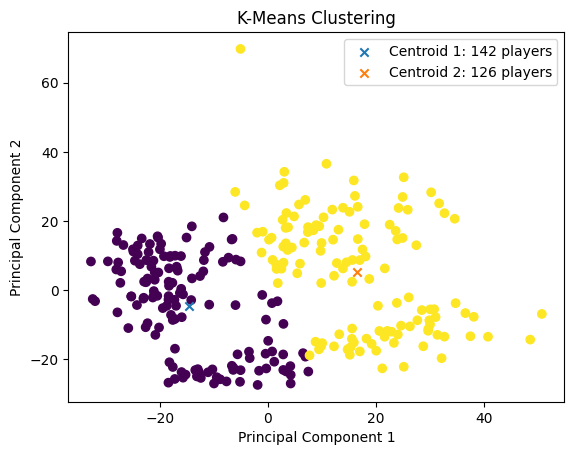

Centroids k = 2: [[75.22535211 21.57253521  8.58591549  3.32887324  7.36338028 45.31760563
   0.26690141  0.85915493 18.81338028  1.66126761  2.31338028 71.46549296
   1.23028169  2.38661972  3.61549296  2.11338028  0.78239437  0.44577465
   1.50985915]
 [45.06349206 12.10238095  4.01825397  1.5484127   3.61031746 42.90079365
   0.16031746  0.52936508 18.09920635  0.75793651  1.11587302 67.55396825
   0.68968254  1.32063492  2.00714286  1.01269841  0.42777778  0.25793651
   0.8031746 ]]


In [338]:
centroids, clusters = k_means(teste.values, 2)

print("Centroids k = 2:", centroids)

##### K-Means para k = 3

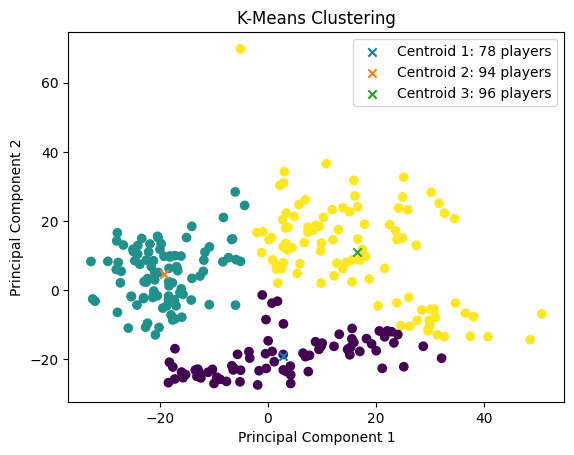

Centroids k = 3: [[6.58717949e+01 1.59448718e+01 5.80128205e+00 2.30384615e+00
  4.74358974e+00 4.81371795e+01 1.28205128e-03 4.74358974e-02
  1.00384615e+00 1.19487179e+00 1.81282051e+00 6.44051282e+01
  1.35641026e+00 2.27564103e+00 3.62179487e+00 9.53846154e-01
  4.83333333e-01 5.91025641e-01 1.08333333e+00]
 [7.55425532e+01 2.34478723e+01 9.60744681e+00 3.68617021e+00
  8.38297872e+00 4.36468085e+01 4.32978723e-01 1.33723404e+00
  2.84872340e+01 1.80319149e+00 2.43617021e+00 7.40574468e+01
  1.06808511e+00 2.28404255e+00 3.35531915e+00 2.61276596e+00
  9.10638298e-01 3.29787234e-01 1.65212766e+00]
 [4.29270833e+01 1.18791667e+01 3.85312500e+00 1.47500000e+00
  3.56770833e+00 4.14906250e+01 1.80208333e-01 6.17708333e-01
  2.28739583e+01 7.15625000e-01 1.02812500e+00 6.95302083e+01
  5.77083333e-01 1.17812500e+00 1.75416667e+00 1.12187500e+00
  4.34375000e-01 1.94791667e-01 7.89583333e-01]]


In [339]:
centroids_new, clusters_new = k_means(teste.values, 3)

print("Centroids k = 3:", centroids_new)

##### Análise dos resultados obtidos para K-Means

Os gráficos fornecidos representam a aplicação do algoritmo K-Means para k=2 e k=3, respectivamente. As cores diferentes representam clusters distintos determinados pelo K-Means, enquanto as marcas em forma de 'X' representam os centróides de cada cluster, acompanhados na legenda pela quantidade de jogadores contidas nos clusters dos respectivos centróides.

Para o gráfico com k=2:

Há dois clusters diferenciados, com os centróides posicionados nas regiões de maior densidade de pontos de cada cluster. Isso indica que, para duas variáveis principais (componentes principais), o algoritmo dividiu os jogadores em dois grupos baseados em suas similaridades nestas dimensões. Os centróides ajudam a entender o "centro de massa" de cada grupo, indicando as características médias dos jogadores em cada cluster. 

Considerando a base de dados de teste, que possui uma quantidade menor de dados e sabendo que a coluna TARGET_5Yrs indica que 168 jogadores permaneceram mais de 5 anos e 100 menos de 5 anos, pode-se inferir o seguinte:

Cluster amarelo: Com 104 jogadores, o cluster representa os jogadores que permaneceram menos de 5 anos, o que indica que o K-Means conseguiu identificar muito bem essa categoria, considerando os números totais fornecidos.

Cluster roxo: Com 164 jogadores, o cluster representa os que permaneceram mais de 5 anos e o algoritmo também teve bom sucesso em agrupar esses jogadores, embora a separação não seja exatamente igual aos dados originais.

Para o gráfico com k=3:

Observamos três clusters claramente separados, cada um com seu próprio centróide. A adição de um terceiro cluster indica uma nuance adicional na divisão dos jogadores, separando-os em categorias mais refinadas de desempenho ou características. Os centróides aqui também indicam os pontos centrais de cada cluster. Com três clusters, a separação entre jogadores de desempenho semelhante é potencialmente mais precisa, o que pode ajudar a identificar padrões mais específicos relacionados à permanência dos jogadores na liga.

A escolha entre k=2 e k=3 depende do objetivo da análise. Se o interesse for em uma distinção mais genérica, k=2 pode ser suficiente. Se estivermos buscando entender variações mais sutis entre os jogadores, k=3 (ou mais) pode ser mais apropriado.


##### Extra - K-Means com scikit-learn

In [340]:
# Define a função k-means
def k_means(X, k, max_iterations=100):
    # Cria um modelo KMeans com k clusters e um número máximo de iterações
    kmeans_model = KMeans(n_clusters=k, max_iter=max_iterations)
    # Ajusta o modelo aos dados
    kmeans_model.fit(X)
    # Obtém os centróides dos clusters
    centroids = kmeans_model.cluster_centers_
    # Calcula os rótulos dos pontos usando o método predict
    labels = kmeans_model.predict(X)
    # Cria uma lista de clusters
    clusters = [X[labels == i] for i in range(k)]

    # Define as cores para a plotagem
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Aplica PCA para visualização em 2D
    pca = PCA(n_components=2)
    teste_pca = pca.fit_transform(X)
    centroids_pca = pca.transform(centroids)

    # Plota os pontos e os centróides
    num_clusters = np.bincount(labels)

    # Plota os pontos e os centróides
    
    plt.scatter(teste_pca[:, 0], teste_pca[:, 1], c=labels)

    for i, count in enumerate(num_clusters):
        plt.scatter(centroids_pca[i, 0], centroids_pca[i, 1], label=f'Centroid {i+1}: {count} players', marker='x')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-Means Clustering with PCA scikit-learn')
    plt.legend()
    plt.show()

    # Retorna os centróides e os clusters
    return centroids, clusters

##### K-Means com scikit-learn para k = 2

/home/isabella/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


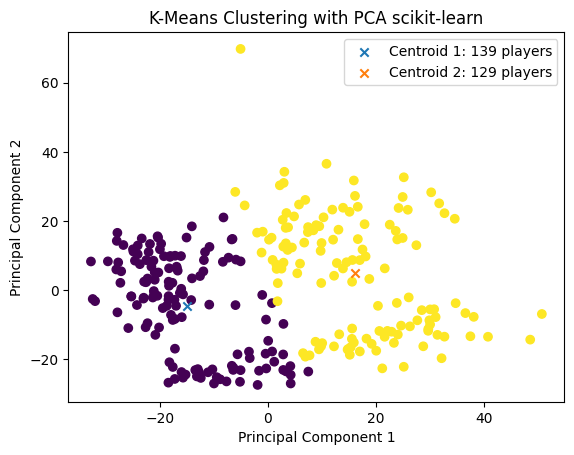

Centroids k = 2: [[75.51798561 21.72302158  8.64244604  3.35107914  7.41942446 45.26978417
   0.27194245  0.87338129 19.11366906  1.66690647  2.31870504 71.57482014
   1.23021583  2.39352518  3.62302158  2.14100719  0.78992806  0.44100719
   1.51510791  0.76258993]
 [45.4496124  12.16046512  4.06356589  1.56589147  3.6372093  43.00852713
   0.15736434  0.52170543 17.79224806  0.77286822  1.1379845  67.52713178
   0.70232558  1.3379845   2.03643411  1.00852713  0.42790698  0.26744186
   0.81395349  0.48062016]]


In [341]:
centroids, clusters = k_means(teste.values, 2)

print("Centroids k = 2:", centroids)

##### K-Means com scikit-learn para k = 3

/home/isabella/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


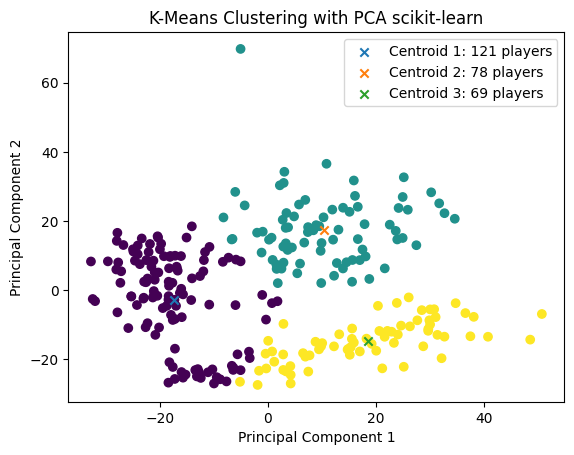

Centroids k = 3: [[7.65867769e+01 2.26074380e+01 9.11074380e+00 3.52561983e+00
  7.83966942e+00 4.50123967e+01 3.00826446e-01 9.66115702e-01
  2.10504132e+01 1.75619835e+00 2.40082645e+00 7.31190083e+01
  1.21735537e+00 2.44710744e+00 3.66528926e+00 2.34297521e+00
  8.33884298e-01 4.28099174e-01 1.59256198e+00 7.60330579e-01]
 [4.60512821e+01 1.30679487e+01 4.40256410e+00 1.66282051e+00
  4.09871795e+00 4.03461538e+01 2.78205128e-01 8.92307692e-01
  3.03897436e+01 7.85897436e-01 1.08846154e+00 7.25307692e+01
  5.24358974e-01 1.18589744e+00 1.70641026e+00 1.36025641e+00
  4.91025641e-01 1.76923077e-01 8.79487179e-01 3.84615385e-01]
 [5.07391304e+01 1.20782609e+01 4.05362319e+00 1.61594203e+00
  3.36521739e+00 4.70594203e+01 5.55111512e-17 3.18840580e-02
  5.00000000e-01 8.34782609e-01 1.35797101e+00 6.02188406e+01
  1.06376812e+00 1.69130435e+00 2.74927536e+00 5.52173913e-01
  3.73913043e-01 4.37681159e-01 7.86956522e-01 6.66666667e-01]]


In [342]:
centroids_new, clusters_new = k_means(teste.values, 3)

print("Centroids k = 3:", centroids_new)

##### Comparação dos resultados obtidos com a implementação manual do K-Means e com a bilbioteca scikit-learn

O algoritmo K-Means é determinístico, o que significa que, dadas as mesmas condições iniciais (por exemplo, os mesmos centróides iniciais e o mesmo número de iterações), ele produzirá os mesmos resultados. Portanto, ele se torna sensível à inicialização dos centróides, logo se os centróides iniciais foram diferentes, os resultados podem ser diferentes.

Além disso, na implementação do K-Means do scikit-learn o número de vezes padrão que o algoritmo será executado com diferentes centróides iniciais é 10. Isso significa que o algoritmo K-Means será executado 10 vezes, cada vez com um conjunto diferente de centróides iniciais escolhidos aleatoriamente. Na implementação manual do K-Means, normalmente executamos o algoritmo apenas uma vez com um conjunto de centróides iniciais. Portanto, é possível que a implementação manual possa convergir para um mínimo local, dependendo da inicialização dos centróides.

Por esses motivos, é possível identificar algumas diferenças entre os resultados obtidos a partir da implementação manual do K-Means e a implementação usando a biblioteca scikit-learn.
